<font size="6">Data Cleaning</font>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the data from the CSV file
df_stock = pd.read_csv("NEWS_YAHOO_stock_prediction.csv")

# Check for duplicates
print("Number of duplicates: ", df_stock.duplicated().sum())
df_stock.drop_duplicates(inplace=True)

# drop unamed 0 column

df_stock.drop('Unnamed: 0', axis=1, inplace=True)


# Check for missing values
print(df_stock.isnull().sum())

# Impute missing values
# Replace missing values in the 'Open', 'High', 'Low', and 'Close' columns with the mean value
df_stock['Open'].fillna(df_stock['Open'].mean(), inplace=True)
df_stock['High'].fillna(df_stock['High'].mean(), inplace=True)
df_stock['Low'].fillna(df_stock['Low'].mean(), inplace=True)
df_stock['Close'].fillna(df_stock['Close'].mean(), inplace=True)

# Convert 'Date' column to datetime type
df_stock['Date'] = pd.to_datetime(df_stock['Date'])



Number of duplicates:  0
ticker       0
Date         0
category     0
title        0
content      0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
label        0
dtype: int64


<font size="6">Exploratory Data Analysis (EDA)</font>


In [2]:
df_stock.shape

(15975, 12)

In [3]:
df_stock.head()

,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0


In [4]:
df_stock.tail()

,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
15970,AAPL,2012-07-31,opinion,What s Driving China s Real Estate Rally Par...,In the preceding posts I examined the first t...,21.543928,21.846430,21.525715,21.812857,18.624512,462327600,1
15971,AAPL,2012-07-31,opinion,50 Stocks With The Best Dividend Growth In Jul...,Here is a current sheet of companies with fast...,21.543928,21.846430,21.525715,21.812857,18.624512,462327600,1
15972,AAPL,2012-07-23,opinion,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1
15973,AAPL,2012-07-23,opinion,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1
15974,AAPL,2012-07-23,opinion,Trade Apple After Earnings,It may look like a spider web but the mishmas...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1


In [5]:
df_stock.dtypes

ticker               object
Date         datetime64[ns]
category             object
title                object
content              object
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
label                 int64
dtype: object

In [6]:
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume,label
count,15975.000000,15975.000000,15975.000000,15975.000000,15975.000000,1.597500e+04,15975.000000
mean,40.584260,40.953353,40.242183,40.606010,38.740126,1.536626e+08,0.553365
std,11.883503,11.979193,11.798219,11.890681,12.157187,1.095820e+08,0.497160
min,13.856071,14.271429,13.753571,13.947500,12.084597,4.544800e+07,0.000000
25%,31.522499,31.772499,31.262500,31.462501,28.576729,9.517400e+07,0.000000
50%,40.937500,41.432499,40.602501,41.000000,39.263371,1.211508e+08,1.000000
75%,47.125000,47.432499,46.695000,47.037498,45.263882,1.691656e+08,1.000000
max,80.062500,80.832497,79.379997,79.807503,78.315315,1.460852e+09,1.000000


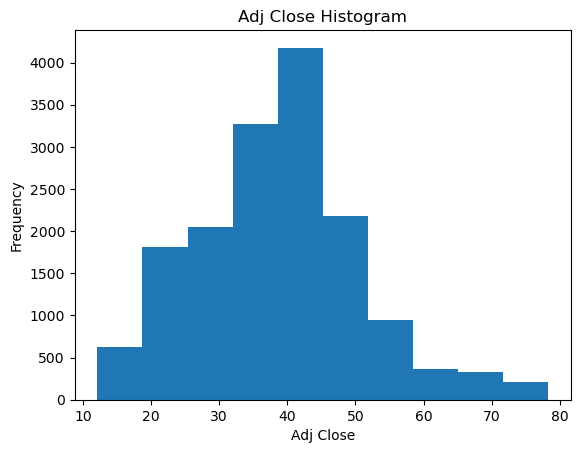

In [7]:
plt.hist(df_stock['Adj Close'], bins=10)
plt.xlabel('Adj Close')
plt.ylabel('Frequency')
plt.title('Adj Close Histogram')
plt.show()

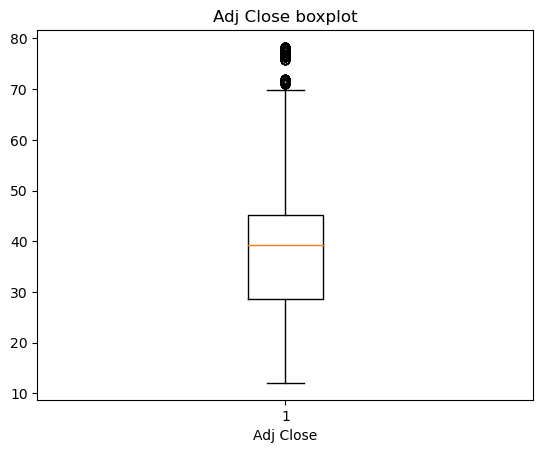

In [8]:
plt.boxplot(df_stock['Adj Close'])
plt.xlabel('Adj Close')
plt.title('Adj Close boxplot')
plt.show()


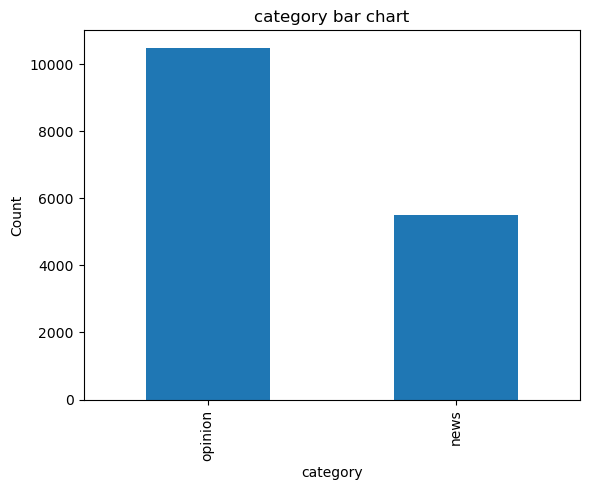

In [9]:
df_stock['category'].value_counts().plot(kind='bar')
plt.xlabel('category')
plt.ylabel('Count')
plt.title('category bar chart')
plt.show()

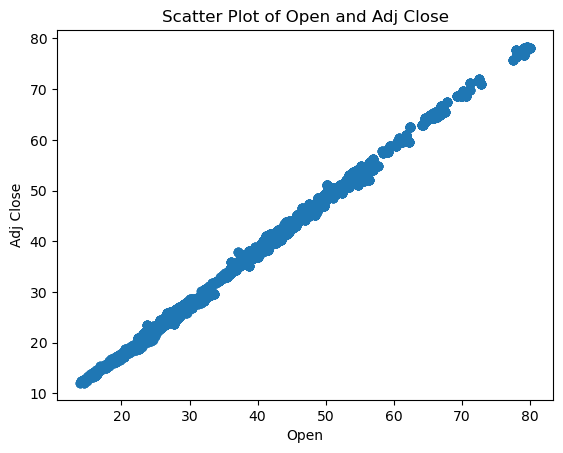

In [10]:
plt.scatter(df_stock['Open'], df_stock['Adj Close'])
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.title('Scatter Plot of Open and Adj Close')
plt.show()

In [11]:
corr = df_stock['Open'].corr(df_stock['Adj Close'])
print('Correlation coefficient:', corr)

Correlation coefficient: 0.9988055810975901


C:\Users\anami\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


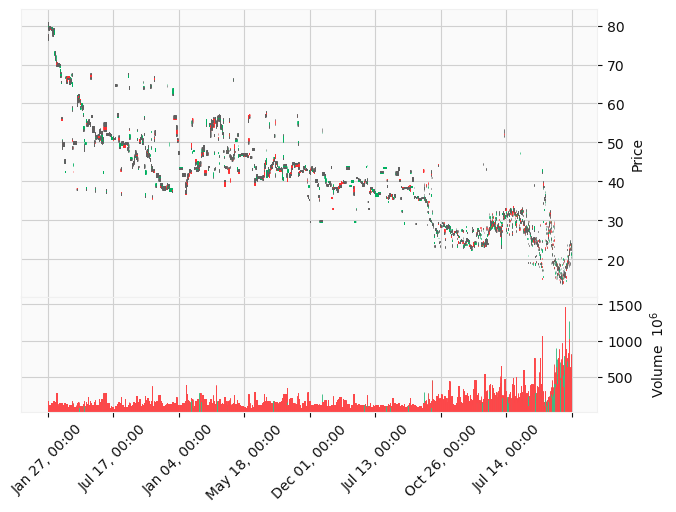

In [13]:
import mplfinance as mpf

df_stock['Date'] = pd.to_datetime(df_stock['Date'])

df_stock.set_index('Date', inplace=True)

mpf.plot(df_stock, type='candle', style='yahoo', volume=True)

C:\Users\anami\AppData\Local\Temp\ipykernel_13340\2569613657.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


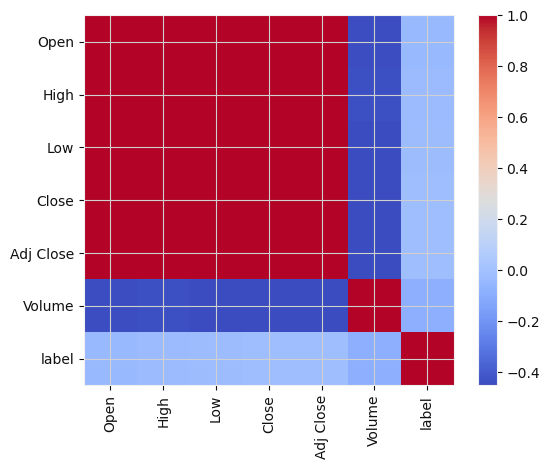

In [16]:
corr_matrix = df_stock.corr()

# Plot the correlation matrix as a heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

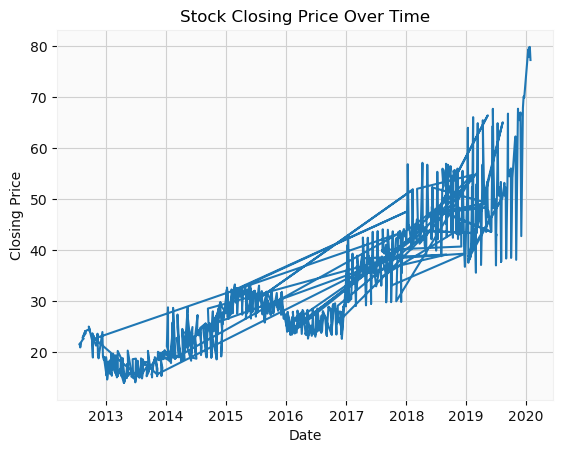

In [18]:

df_weekly = df_stock.resample('W').mean() 
df_monthly = df_stock.resample('M').mean() 

plt.plot(df_stock['Close'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_stock['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.222518
p-value: 0.000603
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


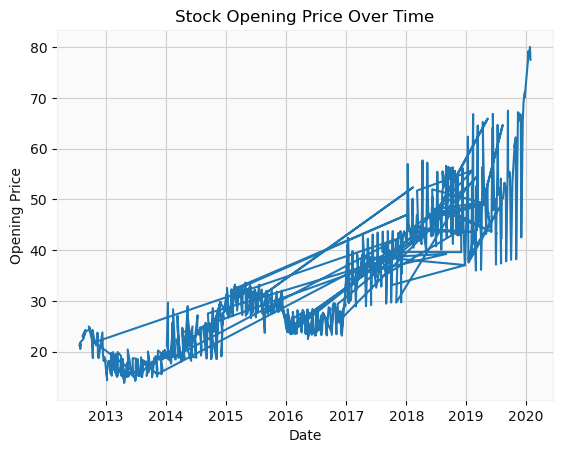

In [19]:
df_weekly = df_stock.resample('W').mean() 
df_monthly = df_stock.resample('M').mean() 

plt.plot(df_stock['Open'])
plt.title('Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.show()

In [21]:
result = adfuller(df_stock['Open'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.226244
p-value: 0.000595
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
